In [9]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [147]:
class Sheetly:

    _LETTERS = ['A','B','C','D','E','F','G']
    _NUMBERS = [n for n in range(1,7)]
    
    _LINESPACE = 2 
    _STAFF_GAP = 10
    _CLEF_LINES = 5
    
    def __init__(self):
        self.treb_range = self._treb_range()
        self.bass_range = self._bass_range()
        self.notes = self._notes()
                
        self.bmin = 0
        self.bmax = self._CLEF_LINES*self._LINESPACE
        self.tmin = self.bmax + 10
        self.tmax = self.tmin + self._CLEF_LINES*self._LINESPACE
    
    def _treb_range(self):
        return [(i+self._STAFF_GAP)*self._LINESPACE for i in range(-1,7)]
    
    def _bass_range(self):
        return [(i)*self._LINESPACE for i in range(-1,6)]
    
    def _notes(self):
        return [f"{a}{n}" for n in self._NUMBERS for a in self._LETTERS]

    
    def treb_y(self,y):
        """
        return treble note associated with y value
        """
        return self._LETTERS[y % 7 - 2] + str((y-2)//7+2)
    
    def bass_y(self,y):
        """
        return bass note associated with y value
        """
        return self._LETTERS[y % 7 - 1] + str(y//7+2)

    def draw_staff(self, xbounds=[0,20],ybounds=[-3,17],axis=False):
        """
        returns the Figure and AxesSubplot associated with the staff plot

        Plot ranges from 0-10 in y and 0-10
        """

        fig, ax = plt.subplots()

        for i in np.arange(self.bmin,self.bmax,self._LINESPACE):
            ax.axhline(i,c='k')
            
#         tmin = bmax + 10
#         tmax = tmin + staff_lines*self._LINESPACE
        for i in np.arange(self.tmin,self.tmax,self._LINESPACE):
            ax.axhline(i,c='k')

        ax.set_aspect('equal')
        ax.set_ylim(np.array(ybounds)*self._LINESPACE)
        ax.set_xlim(np.array(xbounds)*self._LINESPACE)
        if not axis:
            ax.axis('off')

        return fig, ax

    # TODO: make elliptical like actual note symbol
    def draw_notes(self, yvals, ax, xvals=None, duration=None):
        """
        Draws a Circle patch note on the ax passed in

        Args:
            yvals: the list of vertical note position(s) to be plotted
            xvals: the list of x location(s) on the staff. defaults 
            to center of ax if not specified 
            duration: str, optional. determines the filling of the note
            drawn. options are 'whole','half','quarter', etc 
            TODO implement
        """

        if xvals == None:
            x1,x2 = ax.get_xlim()
            xspan = x2-x1
            xvals = [(x1+x2/2)]*len(yvals)
        
        for y, x in zip(yvals, xvals):
            ax.add_patch(Circle((x,y),0.5*self._LINESPACE
                                ,color='k'))
            
            if y in self.bass_range:
                if y < self.bmin-0.5*self._LINESPACE or y > self.bmax-0.5*self._LINESPACE:
                    ax.axhline(y,
                               xmin=(x-.75*self._LINESPACE)/xspan, 
                               xmax=(x+.75*self._LINESPACE)/xspan, 
                               c='k')
                
            if y in self.treb_range:
                if y < self.tmin-0.5*self._LINESPACE or y > self.tmax-0.5*self._LINESPACE:
                    ax.axhline(y,
                               xmin=(x-.75*self._LINESPACE)/xspan, 
                               xmax=(x+.75*self._LINESPACE)/xspan, 
                               c='k')
        
            
    def get_rand_note(self):
        """
        Generate a psuedo-random note
        
        Returns:
            y,note: the vertical position on the staff and the note name 
        """
        
        # flip a coin to choose bass or treble
        if rand.random() > 0.5:
            idcs = self.bass_range
            note_func = self.bass_y
        else:
            idcs = self.treb_range
            note_func = self.treb_y

        y = rand.choice(idcs)
        return (y, note_func(y))        
            
    def record_result():
        # could write answers and responses to file for generating
        # learning stats
        pass

B2


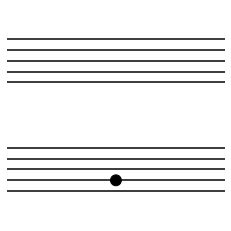

In [156]:
s = Sheetly()
fig, ax = s.draw_staff(axis=False)
# y,note = (18,'C4')
# y,note = (30,'C4')
# y,note = (10,'C4')
# y,note = (-2,'C4')
y,note = s.get_rand_note()
print(note)
s.draw_notes([y],ax)